# EDA Project

In [1168]:
# 
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Import  Data

In [71]:
# Select MTA data -weekly

def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url= url.format(week_num)
        dfs.append(pd.read_csv(file_url, parse_dates=[['DATE', 'TIME']],keep_date_col=True))
    return pd.concat(dfs)

In [1417]:
from pathlib import Path
path_1 = Path(r'C:\Users\ahmad\Documents\SDAIA\EDA_Proj')
cols_list=[4,6,7]
STATION_NAME_BOROUGH = pd.read_csv(path_1.joinpath('nyc-transit-data-turnstiles_station_list_-_2020-03-31-21-17-47.csv')\
                                   , header=None, index_col=0, usecols=cols_list).reset_index()

In [1418]:
Projected_Population = pd.read_csv(path_1.joinpath('Projected_Population_2010-2040_-_Summary (1).csv')\
                                   , index_col=0).reset_index()

In [1419]:
Projected_Population.columns

Index(['Age Group', 'Borough', '2010', '% of Total Borough Population - 2010',
       '2020', '% of Total Borough Population - 2020', '2030',
       '% of Total Borough Population - 2030', '2040',
       '% of Total Borough Population - 2040', 'Change in Number - 2010-2020',
       'Change in Percent - 2010-2020', 'Change in Number - 2020-2030 ',
       'Change in Percent - 2020-2030', 'Change in Number - 2030-2040 ',
       'Change in Percent - 2030-2040', 'Change in Number - 2010-2040 ',
       'Change in Percent - 2010-2040'],
      dtype='object')

In [1420]:
Projected_Population.drop(['2010','% of Total Borough Population - 2010', '% of Total Borough Population - 2020','% of Total Borough Population - 2030',\
       '% of Total Borough Population - 2040','Change in Number - 2010-2020',\
       'Change in Percent - 2010-2020','2040',\
        'Change in Number - 2010-2040 ',\
       'Change in Percent - 2010-2040'], axis=1, inplace= True)

In [1421]:
Projected_Population.Borough.apply(lambda x:x.strip())

0     New York City
1             Bronx
2          Brooklyn
3         Manhattan
4            Queens
5     Staten Island
6     New York City
7             Bronx
8          Brooklyn
9         Manhattan
10           Queens
11    Staten Island
12    New York City
13            Bronx
14         Brooklyn
15        Manhattan
16           Queens
17    Staten Island
Name: Borough, dtype: object

See general information on our datasets

In [1422]:
from sqlalchemy import create_engine
engine = create_engine('sqlite://', echo = False)

In [1423]:
Projected_Population.to_sql('Population', con = engine)

In [1427]:
Projected_Population_sql = pd.read_sql("SELECT * FROM Population  WHERE Borough = '   Bronx' OR Borough = '   Brooklyn' OR Borough = '   Manhattan' OR Borough = '   Queens' OR Borough = '   Staten Island' LIMIT 5 ;" , engine)
Projected_Population_sql

,index,Age Group,Borough,2020,2030,Change in Number - 2020-2030,Change in Percent - 2020-2030,Change in Number - 2030-2040,Change in Percent - 2030-2040
0,1,Total,Bronx,1446788,1518998,72210,4.99,60247,3.97
1,2,Total,Brooklyn,2648452,2754009,105557,3.99,86516,3.14
2,3,Total,Manhattan,1638281,1676720,38439,2.00,14897,0.89
3,4,Total,Queens,2330295,2373551,43256,1.86,39098,2.00
4,5,Total,Staten Island,487155,497749,10594,2.17,3360,0.68


In [1323]:
STATION_NAME_BOROUGH.head(10)

,STATION,BOROUGH,BOROUGH_FULL_NAME
0,ASTORIA DITMARS,Q,QUEENS
1,ASTORIA BLVD,Q,QUEENS
2,30 AV,Q,QUEENS
3,BROADWAY,Q,QUEENS
4,36 AV,Q,QUEENS
5,39 AV,Q,QUEENS
6,5 AV/59 ST,M,MANHATTAN
7,5 AV/59 ST,M,MANHATTAN
8,57 ST-7 AV,M,MANHATTAN
9,49 ST,M,MANHATTAN


In [240]:
STATION_NAME_BOROUGH.rename(columns={4: 'DIVISION', 6: 'STATION', 7:'BOROUGH'}, inplace=True)

In [203]:
STATION_NAME_BOROUGH.head(10)

,DIVISION,STATION,BOROUGH
0,division,stop_name,borough
1,BMT,Astoria - Ditmars Blvd,Q
2,BMT,Astoria Blvd,Q
3,BMT,30 Av,Q
4,BMT,Broadway,Q
5,BMT,36 Av,Q
6,BMT,39 Av,Q
7,BMT,Lexington Av/59 St,M
8,BMT,5 Av/59 St,M
9,BMT,57 St - 7 Av,M


In [241]:
STATION_NAME_BOROUGH.drop(0, inplace= True)

In [242]:
STATION_NAME_BOROUGH.reset_index(drop = True, inplace= True)

In [213]:
STATION_NAME_BOROUGH.head()

,DIVISION,STATION,BOROUGH
0,BMT,Astoria - Ditmars Blvd,Q
1,BMT,Astoria Blvd,Q
2,BMT,30 Av,Q
3,BMT,Broadway,Q
4,BMT,36 Av,Q


In [243]:
len(STATION_NAME_BOROUGH.STATION.unique())

387

In [244]:
STATION_NAME_BOROUGH.STATION.unique()

array(['Astoria - Ditmars Blvd', 'Astoria Blvd', '30 Av', 'Broadway',
       '36 Av', '39 Av', 'Lexington Av/59 St', '5 Av/59 St',
       '57 St - 7 Av', '49 St', 'Times Sq - 42 St', '34 St - Herald Sq',
       '28 St', '23 St', '14 St - Union Sq', '8 St - NYU', 'Prince St',
       'Canal St', 'City Hall', 'Cortlandt St', 'Rector St',
       'Whitehall St', 'Court St', 'Jay St - MetroTech', 'DeKalb Av',
       'Atlantic Av - Barclays Ctr', 'Union St', '9 St', 'Prospect Av',
       '25 St', '36 St', '45 St', '53 St', '59 St', 'Bay Ridge Av',
       '77 St', '86 St', 'Bay Ridge - 95 St', '7 Av', 'Prospect Park',
       'Parkside Av', 'Church Av', 'Beverley Rd', 'Cortelyou Rd',
       'Newkirk Plaza', 'Avenue H', 'Avenue J', 'Avenue M', 'Kings Hwy',
       'Avenue U', 'Neck Rd', 'Sheepshead Bay', 'Brighton Beach',
       'Ocean Pkwy', 'W 8 St - NY Aquarium',
       'Coney Island - Stillwell Av', '9 Av', 'Fort Hamilton Pkwy',
       '50 St', '55 St', '62 St', '71 St', '79 St', '18 Av', '20

In [245]:
STATION_NAME_BOROUGH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DIVISION  511 non-null    object
 1   STATION   511 non-null    object
 2   BOROUGH   496 non-null    object
dtypes: object(3)
memory usage: 12.1+ KB


In [246]:
#Befor
STATION_NAME_BOROUGH.isna().sum()

DIVISION     0
STATION      0
BOROUGH     15
dtype: int64

In [247]:
STATION_NAME_BOROUGH.columns = [column.strip() for column in STATION_NAME_BOROUGH.columns]
STATION_NAME_BOROUGH.columns

Index(['DIVISION', 'STATION', 'BOROUGH'], dtype='object')

In [248]:
#Drop null values
STATION_NAME_BOROUGH.dropna(subset=["BOROUGH"], axis=0, inplace=True)

In [249]:
#After
STATION_NAME_BOROUGH.isna().sum()

DIVISION    0
STATION     0
BOROUGH     0
dtype: int64

In [250]:
STATION_NAME_BOROUGH['STATION'] = STATION_NAME_BOROUGH['STATION'].str.upper()

In [251]:
STATION_NAME_BOROUGH.head()

,DIVISION,STATION,BOROUGH
0,BMT,ASTORIA - DITMARS BLVD,Q
1,BMT,ASTORIA BLVD,Q
2,BMT,30 AV,Q
3,BMT,BROADWAY,Q
4,BMT,36 AV,Q


In [419]:
STATION_NAME_BOROUGH['BOROUGH'].unique()

array(['Q', 'M', 'Bk', 'Bx', 'SI'], dtype=object)

In [420]:
#The Bronx, Brooklyn, Manhattan, Queens, and Staten Island
BOROUGH_dict = {'Q':'QUEENS' , 'M':'MANHATTAN' , 'Bk':'BROOKLYN' , 'Bx':'THE BRONX' , 'SI':'STATEN ISLAND'}
STATION_NAME_BOROUGH['BOROUGH_FULL_NAME'] = STATION_NAME_BOROUGH['BOROUGH'].map(BOROUGH_dict)

In [835]:
STATION_NAME_BOROUGH.tail(100)

,DIVISION,STATION,BOROUGH,BOROUGH_FULL_NAME
396,IRT,96 ST,M,MANHATTAN
397,IRT,86 ST,M,MANHATTAN
398,IRT,77 ST,M,MANHATTAN
399,IRT,68 ST-HUNTER COLLEGE,M,MANHATTAN
400,IRT,59 ST,M,MANHATTAN
...,...,...,...,...
491,SIR,PRINCE'S BAY,SI,STATEN ISLAND
492,SIR,PLEASANT PLAINS,SI,STATEN ISLAND
493,SIR,RICHMOND VALLEY,SI,STATEN ISLAND
494,SIR,TOTTENVILLE,SI,STATEN ISLAND


In [72]:
#generat week_numbers frin get_data funcation

#enter the last two digit of the year (ex. 2019 == 19, 2018== 18)
#months should allways be two digit (ex. september == 09)
#def get_week_numbers(year, month_start, month_end):
#    week_numbers = []
    

In [76]:
#           [2018/9                      2018/10                            2018/11]
week_nums = [180901,180908,180915,180922,180929,181006,181013,181020,181027,181103,181110,181117,181124]
turnstiles_df = get_data(week_nums)

In [77]:
turnstiles_df.head()

,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,2018-08-25 00:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,2018-08-25 04:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,2018-08-25 08:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,2018-08-25 12:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,2018-08-25 16:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


In [78]:
turnstiles_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2585375 entries, 0 to 198721
Data columns (total 12 columns):
 #   Column                                                                Dtype         
---  ------                                                                -----         
 0   DATE_TIME                                                             datetime64[ns]
 1   C/A                                                                   object        
 2   UNIT                                                                  object        
 3   SCP                                                                   object        
 4   STATION                                                               object        
 5   LINENAME                                                              object        
 6   DIVISION                                                              object        
 7   DATE                                                                  obj

In [79]:
turnstiles_df.describe()

,ENTRIES,EXITS
count,2.585375e+06,2.585375e+06
mean,3.913806e+07,3.215483e+07
std,2.032854e+08,1.886973e+08
min,0.000000e+00,0.000000e+00
25%,4.821025e+05,2.258095e+05
50%,2.440346e+06,1.376932e+06
75%,6.917721e+06,4.776678e+06
max,2.129771e+09,2.062565e+09


In [80]:
turnstiles_df.head()

,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,2018-08-25 00:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,2018-08-25 04:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,2018-08-25 08:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,2018-08-25 12:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,2018-08-25 16:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


In [81]:
turnstiles_df.shape

(2585375, 12)

In [1132]:
turnstiles_df.isna().sum()

DATE_TIME        0
C/A              0
UNIT             0
SCP              0
STATION          0
LINENAME         0
DIVISION         0
DATE             0
TIME             0
DESC             0
ENTRIES          0
EXITS            0
TURNSTILE        0
Match_STATION    0
dtype: int64

In [85]:
#Creat new columns to select single turnstile
turnstiles_df['TURNSTILE'] = turnstiles_df['C/A'] + ' ' + turnstiles_df['UNIT'] + ' ' + turnstiles_df['SCP']

In [86]:
turnstiles_df.head()

,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TURNSTILE
0,2018-08-25 00:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184,A002 R051 02-00-00
1,2018-08-25 04:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188,A002 R051 02-00-00
2,2018-08-25 08:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229,A002 R051 02-00-00
3,2018-08-25 12:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314,A002 R051 02-00-00
4,2018-08-25 16:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384,A002 R051 02-00-00


In [1133]:
turnstiles_df.columns = [column.strip() for column in turnstiles_df.columns]
turnstiles_df.columns

Index(['DATE_TIME', 'C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION',
       'DATE', 'TIME', 'DESC', 'ENTRIES', 'EXITS', 'TURNSTILE',
       'Match_STATION'],
      dtype='object')

In [88]:
(turnstiles_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
2255268,R417,R222,00-00-01,PARKCHESTER,2018-10-16 05:00:00,2
1075361,N332,R219,01-06-00,67 AV,2018-10-27 04:00:00,2
2509467,R627,R063,00-03-02,SUTTER AV-RUTLD,2018-11-22 07:00:00,2
1074273,N332,R219,01-05-00,67 AV,2018-10-27 04:00:00,2
1074816,N332,R219,01-05-01,67 AV,2018-10-27 04:00:00,2


In [89]:
turnstiles_df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [1134]:
turnstiles_df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], 
                          inplace=True, ascending=True)

In [1135]:
turnstiles_df

,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TURNSTILE,Match_STATION
0,2018-08-25 00:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184,A002 R051 02-00-00,True
1,2018-08-25 04:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188,A002 R051 02-00-00,True
2,2018-08-25 08:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229,A002 R051 02-00-00,True
3,2018-08-25 12:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314,A002 R051 02-00-00,True
4,2018-08-25 16:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384,A002 R051 02-00-00,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198717,2018-11-23 04:00:00,TRAM2,R469,00-05-01,ROOSEVELT ISLND,R,RIT,11/23/2018,04:00:00,RECOVR AUD,5554,365,TRAM2 R469 00-05-01,True
198718,2018-11-23 08:00:00,TRAM2,R469,00-05-01,ROOSEVELT ISLND,R,RIT,11/23/2018,08:00:00,REGULAR,5554,365,TRAM2 R469 00-05-01,True
198719,2018-11-23 12:00:00,TRAM2,R469,00-05-01,ROOSEVELT ISLND,R,RIT,11/23/2018,12:00:00,REGULAR,5554,365,TRAM2 R469 00-05-01,True
198720,2018-11-23 16:00:00,TRAM2,R469,00-05-01,ROOSEVELT ISLND,R,RIT,11/23/2018,16:00:00,REGULAR,5554,365,TRAM2 R469 00-05-01,True


In [1136]:
(turnstiles_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2018-08-25 00:00:00,1
1723581,R142,R293,01-06-00,34 ST-PENN STA,2018-10-19 10:00:00,1
1723574,R142,R293,01-06-00,34 ST-PENN STA,2018-10-18 10:00:00,1
1723575,R142,R293,01-06-00,34 ST-PENN STA,2018-10-18 14:00:00,1
1723576,R142,R293,01-06-00,34 ST-PENN STA,2018-10-18 18:00:00,1


In [1137]:
#maximum ENTRIES value for each day
turnstiles_daily = (turnstiles_df
                        .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False)
                        .ENTRIES.first())

In [94]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,08/25/2018,6736067
1,A002,R051,02-00-00,59 ST,08/26/2018,6736683
2,A002,R051,02-00-00,59 ST,08/27/2018,6737136
3,A002,R051,02-00-00,59 ST,08/28/2018,6738430
4,A002,R051,02-00-00,59 ST,08/29/2018,6739804


In [1127]:
len(turnstiles_df)

2585366

In [1131]:
len(turnstiles_daily.STATION.unique())

358

Check if the station exist in `turnstiles_df` with same formatting in `STATION_NAME_BOROUGH`

In [391]:
turnstiles_df[turnstiles_df.STATION == "RIT-ROOSEVELT"]

,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TURNSTILE,Match_STATION
197373,2018-08-25 01:00:00,TRAM2,R469,00-00-00,RIT-ROOSEVELT,R,RIT,08/25/2018,01:00:00,REGULAR,4167800,60368,TRAM2 R469 00-00-00,True
197374,2018-08-25 05:00:00,TRAM2,R469,00-00-00,RIT-ROOSEVELT,R,RIT,08/25/2018,05:00:00,REGULAR,4167809,60368,TRAM2 R469 00-00-00,True
197375,2018-08-25 09:00:00,TRAM2,R469,00-00-00,RIT-ROOSEVELT,R,RIT,08/25/2018,09:00:00,REGULAR,4167883,60370,TRAM2 R469 00-00-00,True
197376,2018-08-25 13:00:00,TRAM2,R469,00-00-00,RIT-ROOSEVELT,R,RIT,08/25/2018,13:00:00,REGULAR,4168287,60376,TRAM2 R469 00-00-00,True
197377,2018-08-25 17:00:00,TRAM2,R469,00-00-00,RIT-ROOSEVELT,R,RIT,08/25/2018,17:00:00,REGULAR,4168894,60382,TRAM2 R469 00-00-00,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198717,2018-11-23 04:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,11/23/2018,04:00:00,RECOVR AUD,5554,365,TRAM2 R469 00-05-01,True
198718,2018-11-23 08:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,11/23/2018,08:00:00,REGULAR,5554,365,TRAM2 R469 00-05-01,True
198719,2018-11-23 12:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,11/23/2018,12:00:00,REGULAR,5554,365,TRAM2 R469 00-05-01,True
198720,2018-11-23 16:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,11/23/2018,16:00:00,REGULAR,5554,365,TRAM2 R469 00-05-01,True


In [788]:
STATION_NAME_BOROUGH[STATION_NAME_BOROUGH.STATION == 'JAMAICA VAN WK']

,DIVISION,STATION,BOROUGH,BOROUGH_FULL_NAME
280,IND,JAMAICA VAN WK,Q,QUEENS


Modify `STATION_NAME_BOROUGH` to match `turnstiles_df`

In [379]:
#To change the diff 
STATION_NAME_BOROUGH['STATION'] = STATION_NAME_BOROUGH['STATION'].apply(lambda x:x.replace(' - ', '-'))

In [1108]:
#To fine what is the diff between the two Station col
STATION_NAME_BOROUGH[STATION_NAME_BOROUGH['STATION'].str.contains('HM')].STATION.unique()

array(['RICHMOND VALLEY'], dtype=object)

In [1103]:
#To fine what is the diff between the two Station col
turnstiles_df[turnstiles_df['STATION'].str.contains('68')].STATION.unique()

array(['168 ST', '68ST-HUNTER CO'], dtype=object)

In [1104]:
STATION_NAME_BOROUGH['STATION'] = STATION_NAME_BOROUGH['STATION']\
.apply(lambda x:x.replace('168 ST-WASHINGTON HTS','168 ST'))

In [1106]:
STATION_NAME_BOROUGH['STATION'] = STATION_NAME_BOROUGH['STATION']\
.apply(lambda x:x.replace('68ST-HUNTER COE','68ST-HUNTER CO'))

In [1095]:
STATION_NAME_BOROUGH['STATION'] = STATION_NAME_BOROUGH['STATION']\
.apply(lambda x:x.replace('LEXINGTON AV/63 ST','LEXINGTON AV/63'))

In [1087]:
turnstiles_df['STATION'] = turnstiles_df['STATION']\
.apply(lambda x:x.replace('CITY / BUS','FLATBUSH AV-B.C'))

In [1076]:
STATION_NAME_BOROUGH['STATION'] = STATION_NAME_BOROUGH['STATION']\
.apply(lambda x:x.replace('47-50 STS-ROCKEFELLER CTR','47-50 STS ROCK'))

In [1071]:
STATION_NAME_BOROUGH['STATION'] = STATION_NAME_BOROUGH['STATION']\
.apply(lambda x:x.replace('5 AVE/53 ST','LEXINGTON AV/53'))

In [1068]:
STATION_NAME_BOROUGH['STATION'] = STATION_NAME_BOROUGH['STATION']\
.apply(lambda x:x.replace('LEXINGTON AV/53 ST','5 AV/53 ST'))

In [1065]:
STATION_NAME_BOROUGH['STATION'] = STATION_NAME_BOROUGH['STATION']\
.apply(lambda x:x.replace('161 ST-YANKEE STADIUM','161/YANKEE STAD'))

In [1062]:
STATION_NAME_BOROUGH['STATION'] = STATION_NAME_BOROUGH['STATION']\
.apply(lambda x:x.replace('CLINTON-WASHINGTON AVS','CLINTON-WASH AV'))

In [1059]:
STATION_NAME_BOROUGH['STATION'] = STATION_NAME_BOROUGH['STATION']\
.apply(lambda x:x.replace('KINGSTON-THROOP AVS','KINGSTON-THROOP'))

In [1056]:
STATION_NAME_BOROUGH['STATION'] = STATION_NAME_BOROUGH['STATION']\
.apply(lambda x:x.replace('WORLD TRADE CENTER','WORLD TRADE CTR'))

In [1053]:
STATION_NAME_BOROUGH['STATION'] = STATION_NAME_BOROUGH['STATION']\
.apply(lambda x:x.replace('W 4 ST','W 4 ST-WASH SQ'))

In [1099]:
turnstiles_df['STATION'] = turnstiles_df['STATION']\
.apply(lambda x:x.replace('4AV-9 ST','4 AV'))

In [1098]:
turnstiles_df['STATION'] = turnstiles_df['STATION']\
.apply(lambda x:x.replace('4 AV-9 ST','4 AV'))

In [1043]:
STATION_NAME_BOROUGH['STATION'] = STATION_NAME_BOROUGH['STATION']\
.apply(lambda x:x.replace('3 AV-138 ST','3 AV 138 ST'))

In [1036]:
turnstiles_df['STATION'] = turnstiles_df['STATION']\
.apply(lambda x:x.replace('LACKAWANNA','34 ST-HUDSON YD'))

In [1029]:
turnstiles_df['STATION'] = turnstiles_df['STATION']\
.apply(lambda x:x.replace('30 ST','30 AV'))

In [1013]:
STATION_NAME_BOROUGH['STATION'] = STATION_NAME_BOROUGH['STATION']\
.apply(lambda x:x.replace('25 AVE','25 AV'))

In [1010]:
STATION_NAME_BOROUGH['STATION'] = STATION_NAME_BOROUGH['STATION']\
.apply(lambda x:x.replace('E 105 ST','EAST 105 ST'))

In [1005]:
STATION_NAME_BOROUGH['STATION'] = STATION_NAME_BOROUGH['STATION']\
.apply(lambda x:x.replace('21 ST-QUEENSBRIDGE','21 ST-QNSBRIDGE'))

In [999]:
STATION_NAME_BOROUGH['STATION'] = STATION_NAME_BOROUGH['STATION']\
.apply(lambda x:x.replace('15 ST-PROSPECT PARK','15 ST-PROSPECT'))

In [975]:
turnstiles_df['STATION'] = turnstiles_df['STATION']\
.apply(lambda x:x.replace('VAN SICLEN AVE','VAN SICLEN AV'))

In [968]:
STATION_NAME_BOROUGH['STATION'] = STATION_NAME_BOROUGH['STATION']\
.apply(lambda x:x.replace('SUTPHIN BLVD-ARCHER AV-JFK AIRPORT','SUTPHIN-ARCHER'))

In [963]:
STATION_NAME_BOROUGH['STATION'] = STATION_NAME_BOROUGH['STATION']\
.apply(lambda x:x.replace('FAR ROCKAWAY-MOTT AV','FAR ROCKAWAY'))

In [959]:
STATION_NAME_BOROUGH['STATION'] = STATION_NAME_BOROUGH['STATION']\
.apply(lambda x:x.replace('BROADWAY-LAFAYETTE ST',"B'WAY-LAFAYETTE"))

In [954]:
STATION_NAME_BOROUGH['STATION'] = STATION_NAME_BOROUGH['STATION']\
.apply(lambda x:x.replace('CHRISTOPHER ST-SHERIDAN SQ','CHRISTOPHER ST'))

In [951]:
STATION_NAME_BOROUGH['STATION'] = STATION_NAME_BOROUGH['STATION']\
.apply(lambda x:x.replace('HOYT-SCHERMERHORN STS','HOYT-SCHER'))

In [915]:
STATION_NAME_BOROUGH['STATION'] = STATION_NAME_BOROUGH['STATION']\
.apply(lambda x:x.replace('66 ST-LINCOLN CENTER','66 ST-LINCOLN'))

In [964]:
turnstiles_df['STATION'] = turnstiles_df['STATION']\
.apply(lambda x:x.replace('ROCKAWAY PARK B','ROCKAWAY BLVD'))

In [942]:
turnstiles_df['STATION'] = turnstiles_df['STATION']\
.apply(lambda x:x.replace('9TH STREET','9 ST'))

In [948]:
turnstiles_df['STATION'] = turnstiles_df['STATION']\
.apply(lambda x:x.replace('TWENTY THIRD ST','23 ST'))

In [929]:
turnstiles_df['STATION'] = turnstiles_df['STATION']\
.apply(lambda x:x.replace('THIRTY ST','30 ST'))

In [912]:
STATION_NAME_BOROUGH['STATION'] = STATION_NAME_BOROUGH['STATION']\
.apply(lambda x:x.replace('116 ST-COLUMBIA UNIVERSITY','116 ST-COLUMBIA'))

In [909]:
STATION_NAME_BOROUGH['STATION'] = STATION_NAME_BOROUGH['STATION']\
.apply(lambda x:x.replace('137 ST-CITY COLLEGE','137 ST CITY COL'))

In [905]:
STATION_NAME_BOROUGH['STATION'] = STATION_NAME_BOROUGH['STATION']\
.apply(lambda x:x.replace('MARBLE HILL-225 ST','MARBLE HILL-225'))

In [900]:
STATION_NAME_BOROUGH['STATION'] = STATION_NAME_BOROUGH['STATION']\
.apply(lambda x:x.replace('BROOKLYN BRIDGE-CITY HALL','BROOKLYN BRIDGE'))

In [897]:
STATION_NAME_BOROUGH['STATION'] = STATION_NAME_BOROUGH['STATION']\
.apply(lambda x:x.replace('GRAND CENTRAL-42 ST','GRD CNTRL-42 ST'))

In [893]:
STATION_NAME_BOROUGH['STATION'] = STATION_NAME_BOROUGH['STATION']\
.apply(lambda x:x.replace('68 ST-HUNTER COLLEG','68ST-HUNTER CO'))

In [886]:
STATION_NAME_BOROUGH['STATION'] = STATION_NAME_BOROUGH['STATION']\
.apply(lambda x:x.replace("CENTRAL PARK NORTH (110 ST)",'CENTRAL PK N110'))

In [881]:
STATION_NAME_BOROUGH['STATION'] = STATION_NAME_BOROUGH['STATION']\
.apply(lambda x:x.replace('HARLEM-148 ST','HARLEM 148 ST'))

In [878]:
STATION_NAME_BOROUGH['STATION'] = STATION_NAME_BOROUGH['STATION']\
.apply(lambda x:x.replace('WEST FARMS SQ-E TREMONT AV','WEST FARMS SQ'))

In [875]:
STATION_NAME_BOROUGH['STATION'] = STATION_NAME_BOROUGH['STATION']\
.apply(lambda x:x.replace('WAKEFIELD-241 ST','WAKEFIELD/241'))

In [864]:
STATION_NAME_BOROUGH['STATION'] = STATION_NAME_BOROUGH['STATION']\
.apply(lambda x:x.replace("E 143 ST-ST MARY'S ST","E 143/ST MARY'S"))

In [853]:
STATION_NAME_BOROUGH['STATION'] = STATION_NAME_BOROUGH['STATION']\
.apply(lambda x:x.replace('WESTCHESTER SQ-E TREMONT AV','WESTCHESTER SQ'))

In [846]:
turnstiles_df['STATION'] = turnstiles_df['STATION']\
.apply(lambda x:x.replace('33 ST-RAWSON ST','96 ST'))

In [847]:
turnstiles_df['STATION'] = turnstiles_df['STATION']\
.apply(lambda x:x.replace('33 ST-RAWSON ST','33 ST'))

In [836]:
turnstiles_df['STATION'] = turnstiles_df['STATION']\
.apply(lambda x:x.replace('RIT-MANHATTAN','96 ST'))

In [831]:
turnstiles_df['STATION'] = turnstiles_df['STATION']\
.apply(lambda x:x.replace('RIT-ROOSEVELT','ROOSEVELT ISLND'))

In [821]:
STATION_NAME_BOROUGH['STATION'] = STATION_NAME_BOROUGH['STATION']\
.apply(lambda x:x.replace('175 ST-ELDERTS','175 ST'))

In [822]:
STATION_NAME_BOROUGH['STATION'] = STATION_NAME_BOROUGH['STATION']\
.apply(lambda x:x.replace('174-175 ST-ELDERTSS','175 ST'))

In [819]:
STATION_NAME_BOROUGH['STATION'] = STATION_NAME_BOROUGH['STATION']\
.apply(lambda x:x.replace('75 AVE','75 AV'))

In [809]:
STATION_NAME_BOROUGH['STATION'] = STATION_NAME_BOROUGH['STATION']\
.apply(lambda x:x.replace('5 AVE/59 ST','5 AV/59 ST'))

In [793]:
STATION_NAME_BOROUGH['STATION'] = STATION_NAME_BOROUGH['STATION']\
.apply(lambda x:x.replace('ROOSEVELT ISLAND','ROOSEVELT ISLND'))

In [804]:
turnstiles_df['STATION'] = turnstiles_df['STATION']\
.apply(lambda x:x.replace('NEW LOTS AV AV','NEW LOTS AV'))

In [789]:
turnstiles_df['STATION'] = turnstiles_df['STATION']\
.apply(lambda x:x.replace('JAMAICA CENTER','JFK JAMAICA CT1'))

In [783]:
turnstiles_df['STATION'] = turnstiles_df['STATION']\
.apply(lambda x:x.replace('72 ST-2 AVE','72 ST'))

In [780]:
turnstiles_df['STATION'] = turnstiles_df['STATION']\
.apply(lambda x:x.replace('86 ST-2 AVE','86 ST'))

In [776]:
turnstiles_df['STATION'] = turnstiles_df['STATION']\
.apply(lambda x:x.replace('96 ST-2 AVE','96 ST'))

In [771]:
STATION_NAME_BOROUGH['STATION'] = STATION_NAME_BOROUGH['STATION']\
.apply(lambda x:x.replace('ROCKAWAY PARK-BEACH 116 ST','ORCHARD BEACH'))

In [766]:
STATION_NAME_BOROUGH['STATION'] = STATION_NAME_BOROUGH['STATION']\
.apply(lambda x:x.replace('NEW LOTS','NEW LOTS AV'))

In [757]:
STATION_NAME_BOROUGH['STATION'] = STATION_NAME_BOROUGH['STATION']\
.apply(lambda x:x.replace('NORWOOD-205 ST','NORWOOD 205 ST'))

In [752]:
STATION_NAME_BOROUGH['STATION'] = STATION_NAME_BOROUGH['STATION']\
.apply(lambda x:x.replace('JACKSON HTS-ROOSEVELT AV','JKSN HT-ROOSVLT'))

In [744]:
STATION_NAME_BOROUGH['STATION'] = STATION_NAME_BOROUGH['STATION']\
.apply(lambda x:x.replace('138 ST-GRAND CONCOURSE','138/GRAND CONC'))

In [745]:
STATION_NAME_BOROUGH['STATION'] = STATION_NAME_BOROUGH['STATION']\
.apply(lambda x:x.replace('149 ST-GRAND CONCOURSE','149/GRAND CONC'))

In [743]:
STATION_NAME_BOROUGH['STATION'] = STATION_NAME_BOROUGH['STATION']\
.apply(lambda x:x.replace('GRAND AV-NEWTOWN','GRAND-NEWTOWN'))

In [739]:
STATION_NAME_BOROUGH['STATION'] = STATION_NAME_BOROUGH['STATION']\
.apply(lambda x:x.replace('COURT ST','COURT SQ-23 ST'))

In [736]:
STATION_NAME_BOROUGH['STATION'] = STATION_NAME_BOROUGH['STATION']\
.apply(lambda x:x.replace('SMITH-9 STS','SMITH-9 ST'))

In [733]:
STATION_NAME_BOROUGH['STATION'] = STATION_NAME_BOROUGH['STATION']\
.apply(lambda x:x.replace('OZONE PARK-LEFFERTS BLVD','OZONE PK LEFFRT'))

In [727]:
STATION_NAME_BOROUGH['STATION'] = STATION_NAME_BOROUGH['STATION']\
.apply(lambda x:x.replace('AQUEDUCT RACETRACK','AQUEDUCT RACETR'))

In [728]:
STATION_NAME_BOROUGH['STATION'] = STATION_NAME_BOROUGH['STATION']\
.apply(lambda x:x.replace('AQUEDUCT-N CONDUIT AV','AQUEDUCT N.COND'))

In [721]:
STATION_NAME_BOROUGH['STATION'] = STATION_NAME_BOROUGH['STATION']\
.apply(lambda x:x.replace('BEDFORD-NOSTRAND AVS','BEDFORD-NOSTRAN'))

In [723]:
STATION_NAME_BOROUGH['STATION'] = STATION_NAME_BOROUGH['STATION']\
.apply(lambda x:x.replace('BEDFORD PK BLVD-LEHMAN COLLEGE','BEDFORD PK BLVD'))

In [719]:
STATION_NAME_BOROUGH['STATION'] = STATION_NAME_BOROUGH['STATION']\
.apply(lambda x:x.replace('BEDFORD PARK BLVD','BEDFORD PK BLVD'))

In [716]:
STATION_NAME_BOROUGH['STATION'] = STATION_NAME_BOROUGH['STATION']\
.apply(lambda x:x.replace('KEW GARDENS-UNION TPKE','KEW GARDENS'))

In [708]:
STATION_NAME_BOROUGH['STATION'] = STATION_NAME_BOROUGH['STATION']\
.apply(lambda x:x.replace('MYRTLE-WILLOUGHBY AVS','MYRTLE-WILLOUGH'))

In [705]:
STATION_NAME_BOROUGH['STATION'] = STATION_NAME_BOROUGH['STATION']\
.apply(lambda x:x.replace('BRIARWOOD-VAN WYCK BLVD','BRIARWOOD'))

In [689]:
STATION_NAME_BOROUGH['STATION'] = STATION_NAME_BOROUGH['STATION']\
.apply(lambda x:x.replace('33 ST-RAWSON ST','33 ST'))

In [684]:
STATION_NAME_BOROUGH['STATION'] = STATION_NAME_BOROUGH['STATION']\
.apply(lambda x:x.replace('ASTORIA-DITMARS BLVD','ASTORIA DITMARS'))

In [678]:
STATION_NAME_BOROUGH['STATION'] = STATION_NAME_BOROUGH['STATION']\
.apply(lambda x:x.replace('QUEENSBORO PLAZA','QUEENSBORO PLZ'))

In [675]:
STATION_NAME_BOROUGH['STATION'] = STATION_NAME_BOROUGH['STATION']\
.apply(lambda x:x.replace('HUNTERS POINT AV','HUNTERS PT AV'))

In [671]:
STATION_NAME_BOROUGH['STATION'] = STATION_NAME_BOROUGH['STATION']\
.apply(lambda x:x.replace('VERNON BLVD-JACKSON AV','VERNON-JACKSON'))

In [668]:
STATION_NAME_BOROUGH['STATION'] = STATION_NAME_BOROUGH['STATION']\
.apply(lambda x:x.replace('5 AV','5 AVE'))

In [660]:
STATION_NAME_BOROUGH['STATION'] = STATION_NAME_BOROUGH['STATION']\
.apply(lambda x:x.replace('METS-WILLETS POINT','METS-WILLETS PT'))

In [657]:
STATION_NAME_BOROUGH['STATION'] = STATION_NAME_BOROUGH['STATION']\
.apply(lambda x:x.replace('90 ST-ELMHURST AV','90 ST-ELMHURST'))

In [654]:
STATION_NAME_BOROUGH['STATION'] = STATION_NAME_BOROUGH['STATION']\
.apply(lambda x:x.replace('82 ST-JACKSON HTS','82 ST-JACKSON H'))

In [651]:
STATION_NAME_BOROUGH['STATION'] = STATION_NAME_BOROUGH['STATION']\
.apply(lambda x:x.replace('WOODSIDE-61 ST','61 ST WOODSIDE'))

In [648]:
turnstiles_df['STATION'] = turnstiles_df['STATION']\
.apply(lambda x:x.replace('46 ST BLISS ST','46 ST'))

In [645]:
STATION_NAME_BOROUGH['STATION'] = STATION_NAME_BOROUGH['STATION']\
.apply(lambda x:x.replace('40 ST','40 ST LOWERY ST'))

In [638]:
STATION_NAME_BOROUGH['STATION'] = STATION_NAME_BOROUGH['STATION']\
.apply(lambda x:x.replace('34 ST-PENN STATION','34 ST-PENN STA'))

In [635]:
STATION_NAME_BOROUGH['STATION'] = STATION_NAME_BOROUGH['STATION']\
.apply(lambda x:x.replace('WTC CORTLANDT','WTC-CORTLANDT'))

In [740]:
STATION_NAME_BOROUGH['STATION'] = STATION_NAME_BOROUGH['STATION']\
.apply(lambda x:x.replace('VAN CORTLANDT PARK-242 ST','V.CORTLANDT PK'))

In [631]:
STATION_NAME_BOROUGH['STATION'] = STATION_NAME_BOROUGH['STATION']\
.apply(lambda x:x.replace('42 ST-PORT AUTHORITY BUS TERMINAL','42 ST-PORT AUTH'))

In [628]:
STATION_NAME_BOROUGH['STATION'] = STATION_NAME_BOROUGH['STATION']\
.apply(lambda x:x.replace('LEXINGTON AV/59 ST','5 AV/59 ST'))

In [627]:
STATION_NAME_BOROUGH['STATION'] = STATION_NAME_BOROUGH['STATION']\
.apply(lambda x:x.replace('59 ST-COLUMBUS CIRCLE','59 ST COLUMBUS'))

In [623]:
STATION_NAME_BOROUGH['STATION'] = STATION_NAME_BOROUGH['STATION']\
.apply(lambda x:x.replace('163 ST-AMSTERDAM AV','163 ST-AMSTERDM'))

In [618]:
STATION_NAME_BOROUGH['STATION'] = STATION_NAME_BOROUGH['STATION']\
.apply(lambda x:x.replace('FOREST HILLS-71 AV','FOREST HILLS 71'))

In [619]:
STATION_NAME_BOROUGH['STATION'] = STATION_NAME_BOROUGH['STATION']\
.apply(lambda x:x.replace('FOREST AV','FOREST AVE'))

In [614]:
STATION_NAME_BOROUGH['STATION'] = STATION_NAME_BOROUGH['STATION']\
.apply(lambda x:x.replace('SENECA AV','SENECA AVE'))

In [615]:
STATION_NAME_BOROUGH['STATION'] = STATION_NAME_BOROUGH['STATION']\
.apply(lambda x:x.replace('KNICKERBOCKER AV','KNICKERBOCKER'))

In [604]:
STATION_NAME_BOROUGH['STATION'] = STATION_NAME_BOROUGH['STATION']\
.apply(lambda x:x.replace('JAMAICA CENTER-PARSONS/ARCHER','JAMAICA CENTER'))

In [601]:
STATION_NAME_BOROUGH['STATION'] = STATION_NAME_BOROUGH['STATION']\
.apply(lambda x:x.replace('JAMAICA-179 ST','JAMAICA 179 ST'))

In [602]:
STATION_NAME_BOROUGH['STATION'] = STATION_NAME_BOROUGH['STATION']\
.apply(lambda x:x.replace('JAMAICA CENTER-PARSONS/ARCHER','JFK JAMAICA CT1'))

In [603]:
STATION_NAME_BOROUGH['STATION'] = STATION_NAME_BOROUGH['STATION']\
.apply(lambda x:x.replace('JAMAICA-VAN WYCK','JAMAICA VAN WK'))

In [598]:
STATION_NAME_BOROUGH['STATION'] = STATION_NAME_BOROUGH['STATION']\
.apply(lambda x:x.replace('HOWARD BEACH-JFK AIRPORT','HOWARD BCH JFK'))

In [595]:
STATION_NAME_BOROUGH['STATION'] = STATION_NAME_BOROUGH['STATION']\
.apply(lambda x:x.replace('85 ST-FOREST PKWY','85 ST-FOREST PK'))

In [592]:
STATION_NAME_BOROUGH['STATION'] = STATION_NAME_BOROUGH['STATION']\
.apply(lambda x:x.replace('75 ST','75 ST-ELDERTS'))

In [577]:
STATION_NAME_BOROUGH['STATION'] = STATION_NAME_BOROUGH['STATION']\
.apply(lambda x:x.replace('GRAND ARMY PLAZA','GRAND ARMY PLAZ'))

In [574]:
STATION_NAME_BOROUGH['STATION'] = STATION_NAME_BOROUGH['STATION']\
.apply(lambda x:x.replace('FLUSHING-MAIN ST','FLUSHING-MAIN'))

In [571]:
STATION_NAME_BOROUGH['STATION'] = STATION_NAME_BOROUGH['STATION']\
.apply(lambda x:x.replace('CANARSIE-ROCKAWAY PKWY','CANARSIE-ROCKAW'))

In [566]:
STATION_NAME_BOROUGH['STATION'] = STATION_NAME_BOROUGH['STATION']\
.apply(lambda x:x.replace('NEW LOTS AV','NEW LOTS'))

In [561]:
STATION_NAME_BOROUGH['STATION'] = STATION_NAME_BOROUGH['STATION']\
.apply(lambda x:x.replace('BUSHWICK AV-ABERDEEN ST','BUSHWICK AV'))

In [551]:
STATION_NAME_BOROUGH['STATION'] = STATION_NAME_BOROUGH['STATION']\
.apply(lambda x:x.replace('SUTTER AV-RUTLAND RD','SUTTER AV-RUTLD'))

In [548]:
STATION_NAME_BOROUGH['STATION'] = STATION_NAME_BOROUGH['STATION']\
.apply(lambda x:x.replace('CROWN HTS-UTICA AV','CROWN HTS-UTICA'))

In [545]:
STATION_NAME_BOROUGH['STATION'] = STATION_NAME_BOROUGH['STATION']\
.apply(lambda x:x.replace('EASTERN PKWY-BROOKLYN MUSEUM','EASTN PKWY-MUSM'))

In [539]:
STATION_NAME_BOROUGH['STATION'] = STATION_NAME_BOROUGH['STATION']\
.apply(lambda x:x.replace('MYRTLE-WYCKOFF AVS','MYRTLE-WYCKOFF'))

In [536]:
STATION_NAME_BOROUGH['STATION'] = STATION_NAME_BOROUGH['STATION']\
.apply(lambda x:x.replace('W 8 ST-NY AQUARIUM','W 8 ST-AQUARIUM'))

In [533]:
STATION_NAME_BOROUGH['STATION'] = STATION_NAME_BOROUGH['STATION']\
.apply(lambda x:x.replace('CONEY ISLAND-STILLWELL AV','CONEY IS-STILLW'))

In [529]:
STATION_NAME_BOROUGH['STATION'] = STATION_NAME_BOROUGH['STATION']\
.apply(lambda x:x.replace('FORT HAMILTON PKWY','FT HAMILTON PKY'))

In [514]:
STATION_NAME_BOROUGH['STATION'] = STATION_NAME_BOROUGH['STATION']\
.apply(lambda x:x.replace('ST GEORGE','ST. GEORGE'))

In [506]:
STATION_NAME_BOROUGH['STATION'] = STATION_NAME_BOROUGH['STATION']\
.apply(lambda x:x.replace('FLATBUSH AV-BROOKLYN COLLEGE','FLATBUSH AV-B.C'))

In [511]:
STATION_NAME_BOROUGH['STATION'] = STATION_NAME_BOROUGH['STATION']\
.apply(lambda x:x.replace('EASTCHESTER-DYRE AV','EASTCHSTER/DYRE'))

In [503]:
STATION_NAME_BOROUGH['STATION'] = STATION_NAME_BOROUGH['STATION']\
.apply(lambda x:x.replace('ATLANTIC AV-BARCLAYS CTR','ATL AV-BARCLAY'))

In [500]:
STATION_NAME_BOROUGH['STATION'] = STATION_NAME_BOROUGH['STATION']\
.apply(lambda x:x.replace('BEVERLEY RD','BEVERLEY ROAD'))

In [494]:
STATION_NAME_BOROUGH['STATION'] = STATION_NAME_BOROUGH['STATION']\
.apply(lambda x:x.replace('DELANCEY ST','DELANCEY/ESSEX'))

In [497]:
STATION_NAME_BOROUGH['STATION'] = STATION_NAME_BOROUGH['STATION']\
.apply(lambda x:x.replace('PARK PL','PARK PLACE'))

In [491]:
STATION_NAME_BOROUGH['STATION'] = STATION_NAME_BOROUGH['STATION']\
.apply(lambda x:x.replace('WHITEHALL ST','WHITEHALL S-FRY'))

In [464]:
STATION_NAME_BOROUGH['STATION'] = STATION_NAME_BOROUGH['STATION']\
.apply(lambda x:x.replace('103 ST-CORONA PLAZA','103 ST-CORONA'))

In [477]:
STATION_NAME_BOROUGH['STATION'] = STATION_NAME_BOROUGH['STATION']\
.apply(lambda x:x.replace('JAY ST-METROTECH','JAY ST-METROTEC'))

In [380]:
STATION_NAME_BOROUGH['STATION']

0      ASTORIA-DITMARS BLVD
1              ASTORIA BLVD
2                     30 AV
3                  BROADWAY
4                     36 AV
               ...         
491            PRINCE'S BAY
492         PLEASANT PLAINS
493         RICHMOND VALLEY
494             TOTTENVILLE
495             ARTHUR KILL
Name: STATION, Length: 496, dtype: object

In [1114]:
#to see the different station and compare them with population density
len(turnstiles_df.STATION.unique())

358

In [1115]:
pd.DataFrame(STATION_NAME_BOROUGH.STATION.unique())

,0
0,ASTORIA DITMARS
1,ASTORIA BLVD
2,30 AV
3,BROADWAY
4,36 AV
...,...
369,PRINCE'S BAY
370,PLEASANT PLAINS
371,RICHMOND VALLEY
372,TOTTENVILLE


In this section, see the matching station that already exist (`STATION_NAME_BOROUGH` & `turnstiles_df`)

In [1116]:
station_in_mta = turnstiles_df.STATION.unique()
station_in_st = STATION_NAME_BOROUGH.STATION.unique()
#c == True_False_df
True_False_df = np.in1d(station_in_mta,station_in_st)

In [314]:
len(True_False_df)

2585366

In [1117]:
True_False_df= pd.DataFrame(True_False_df)

In [1118]:
True_False_df.rename(columns={0: 'STATION'}, inplace=True)
True_False_df.head()         

,STATION
0,True
1,True
2,True
3,True
4,True


In [1138]:
turnstiles_df[turnstiles_df['Match_STATION'] == False].head(5)


,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TURNSTILE,Match_STATION
14062,2018-09-25 09:00:00,B010,R412,00-03-02,BOTANIC GARDEN,S2345,BMT,09/25/2018,09:00:00,REGULAR,93201,558945,B010 R412 00-03-02,False
14063,2018-09-25 13:00:00,B010,R412,00-03-02,BOTANIC GARDEN,S2345,BMT,09/25/2018,13:00:00,REGULAR,93208,559070,B010 R412 00-03-02,False
14064,2018-09-25 17:00:00,B010,R412,00-03-02,BOTANIC GARDEN,S2345,BMT,09/25/2018,17:00:00,REGULAR,93232,559156,B010 R412 00-03-02,False
14065,2018-09-25 21:00:00,B010,R412,00-03-02,BOTANIC GARDEN,S2345,BMT,09/25/2018,21:00:00,REGULAR,93240,559244,B010 R412 00-03-02,False
14066,2018-09-26 01:00:00,B010,R412,00-03-02,BOTANIC GARDEN,S2345,BMT,09/26/2018,01:00:00,REGULAR,93240,559270,B010 R412 00-03-02,False


The below table was originally have around `200` stations (rows), but after applying the modification above it reach ..

In [1139]:
#Station that are not in MTA datase
#w == STATION_NOT_in_turnstiles_df

STATION_NOT_in_turnstiles_df=pd.DataFrame(turnstiles_df['STATION'].unique())
STATION_NOT_in_turnstiles_df.rename(columns={0: 'STATION'}, inplace=True)
STATION_NOT_in_turnstiles_df['BOOL']= True_False_df
STATION_NOT_in_turnstiles_df[STATION_NOT_in_turnstiles_df.BOOL == False]
len(STATION_NOT_in_turnstiles_df[STATION_NOT_in_turnstiles_df.BOOL == False])

12

In [1120]:
#Q = Temp_to_Compare
Temp_to_Compare = STATION_NOT_in_turnstiles_df[STATION_NOT_in_turnstiles_df.BOOL == False]
pd.DataFrame(Temp_to_Compare.STATION.sort_values().unique()).head(5)

,0
0,EXCHANGE PLACE
1,GROVE STREET
2,HARRISON
3,JOURNAL SQUARE
4,MORISN AV/SNDVW


In [1121]:
pd.DataFrame(STATION_NAME_BOROUGH.STATION.sort_values().unique()).head(5)

#57 ST-7 AV, 8 ST-NYU, RIT-ROOSEVELT
#We need to modify the STATION_NAME_BOROUGH.STATION

,0
0,1 AV
1,103 ST
2,103 ST-CORONA
3,104 ST
4,110 ST


In [474]:
Temp_to_Compare.STATION.sort_values().unique()

array(['116 ST-COLUMBIA', '137 ST CITY COL', '138/GRAND CONC',
       '149/GRAND CONC', '14TH STREET', '15 ST-PROSPECT',
       '161/YANKEE STAD', '163 ST-AMSTERDM', '21 ST-QNSBRIDGE',
       '3 AV 138 ST', '33 ST-RAWSON ST', '34 ST-HUDSON YD',
       '34 ST-PENN STA', '4 AV-9 ST', '40 ST LOWERY ST',
       '42 ST-PORT AUTH', '46 ST BLISS ST', '47-50 STS ROCK', '4AV-9 ST',
       '5 AVE', '59 ST COLUMBUS', '61 ST WOODSIDE', '66 ST-LINCOLN',
       '68ST-HUNTER CO', '72 ST-2 AVE', '75 ST-ELDERTS',
       '82 ST-JACKSON H', '85 ST-FOREST PK', '86 ST-2 AVE',
       '90 ST-ELMHURST', '96 ST-2 AVE', '9TH STREET', 'AQUEDUCT N.COND',
       'AQUEDUCT RACETR', 'ASTORIA DITMARS', 'ATL AV-BARCLAY',
       "B'WAY-LAFAYETTE", 'BEDFORD PK BLVD', 'BEDFORD-NOSTRAN',
       'BEVERLEY ROAD', 'BRIARWOOD', 'BROOKLYN BRIDGE', 'BUSHWICK AV',
       'CANARSIE-ROCKAW', 'CENTRAL PK N110', 'CHRISTOPHER ST',
       'CITY / BUS', 'CLINTON-WASH AV', 'CONEY IS-STILLW',
       'COURT SQ-23 ST', 'CROWN HTS-UTICA', '

In [318]:
turnstiles_df.head()

,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TURNSTILE,Match_STATION
0,2018-08-25 00:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184,A002 R051 02-00-00,True
1,2018-08-25 04:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188,A002 R051 02-00-00,True
2,2018-08-25 08:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229,A002 R051 02-00-00,True
3,2018-08-25 12:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314,A002 R051 02-00-00,True
4,2018-08-25 16:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384,A002 R051 02-00-00,True


In [978]:
STATION_NAME_BOROUGH.STATION.sort_values().unique()

array(['1 AV', '103 ST', '103 ST-CORONA', '104 ST', '110 ST', '111 ST',
       '116 ST', '116 ST-COLUMBIA', '121 ST', '125 ST', '135 ST',
       '137 ST CITY COL', '138/GRAND CONC', '14 ST', '14 ST-UNION SQ',
       '145 ST', '149/GRAND CONC', '15 ST-PROSPECT PARK', '155 ST',
       '157 ST', '161 ST-YANKEE STADIUM', '163 ST-AMSTERDM', '167 ST',
       '168 ST', '168 ST-WASHINGTON HTS', '169 ST', '170 ST', '174 ST',
       '174-175 STS', '175 ST', '176 ST', '18 AV', '18 ST', '181 ST',
       '182-183 STS', '183 ST', '190 ST', '191 ST', '2 AV', '20 AV',
       '207 ST', '21 ST', '21 ST-QUEENSBRIDGE', '215 ST', '219 ST',
       '225 ST', '23 ST', '231 ST', '233 ST', '238 ST', '25 AVE', '25 ST',
       '28 ST', '3 AV', '3 AV-138 ST', '3 AV-149 ST', '30 AV', '33 ST',
       '34 ST-HERALD SQ', '34 ST-HUDSON YD', '34 ST-PENN STA', '36 AV',
       '36 ST', '39 AV', '4 AV', '40 ST LOWERY ST', '42 ST-BRYANT PK',
       '42 ST-PORT AUTH', '45 ST', '46 ST', '47-50 STS-ROCKEFELLER CTR',
       '49

In [310]:
pd.merge(turnstiles_df, True_False_df, on = 'STATION')

,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TURNSTILE


In [285]:
np.where(station_in_mta == station_in_st)

<ipython-input-285-cb5575e2b343>:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  np.where(station_in_mta == station_in_st)


(array([], dtype=int64),)

In [295]:
len(pd.merge(STATION_NAME_BOROUGH,turnstiles_df, on='STATION').STATION.unique())

237

In [297]:
djfkgslkjgs =pd.DataFrame(pd.merge(STATION_NAME_BOROUGH,turnstiles_df, on='STATION').STATION.unique())

In [299]:
djfkgslkjgs.rename(columns={0: 'STATION'}, inplace=True)

In [1125]:
STATION_NAME_BOROUGH.drop('DIVISION', axis = 1, inplace= True)
STATION_NAME_BOROUGH.head()

,STATION,BOROUGH,BOROUGH_FULL_NAME
0,ASTORIA DITMARS,Q,QUEENS
1,ASTORIA BLVD,Q,QUEENS
2,30 AV,Q,QUEENS
3,BROADWAY,Q,QUEENS
4,36 AV,Q,QUEENS


At this point we did most of the data cleaning, so here we start to get some useful insights from the data.

Starting by crating new colunm called `DAILY_ENTRIES`

In [1141]:
turnstiles_daily[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"]
                                                       .apply(lambda grp: grp.shift(1)))

<ipython-input-1141-3a945374269e>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  turnstiles_daily[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily


In [1142]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
0,A002,R051,02-00-00,59 ST,08/25/2018,6736067,NaN,NaN
1,A002,R051,02-00-00,59 ST,08/26/2018,6736683,08/25/2018,6736067.0
2,A002,R051,02-00-00,59 ST,08/27/2018,6737136,08/26/2018,6736683.0
3,A002,R051,02-00-00,59 ST,08/28/2018,6738430,08/27/2018,6737136.0
4,A002,R051,02-00-00,59 ST,08/29/2018,6739804,08/28/2018,6738430.0


In [1143]:
turnstiles_daily.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

In [1144]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
1,A002,R051,02-00-00,59 ST,08/26/2018,6736683,08/25/2018,6736067.0
2,A002,R051,02-00-00,59 ST,08/27/2018,6737136,08/26/2018,6736683.0
3,A002,R051,02-00-00,59 ST,08/28/2018,6738430,08/27/2018,6737136.0
4,A002,R051,02-00-00,59 ST,08/29/2018,6739804,08/28/2018,6738430.0
5,A002,R051,02-00-00,59 ST,08/30/2018,6741065,08/29/2018,6739804.0


In [1145]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
# It'd probably be a good idea to use a number even significantly smaller than 1 million as the limit!
turnstiles_daily["DAILY_ENTRIES"] = turnstiles_daily.apply(get_daily_counts, axis=1, max_counter=1000000)

68 7705413.0
336 15255717.0
458806 3408576.0
262209 67148711.0
62 1553987560.0
1525 15832652.0
148 5412830.0
117441024 2306185.0
458754 67109013.0
1864238 67952524.0
881471 117756217.0
89 15071100.0
70 5741006.0
459482 6300572.0
675 6456919.0
525054 3346426.0
13 2183820.0
6 8203336.0
460550 119257511.0
745 706535159.0
5599854 13155.0
135 5212062.0
1476232479 44615524.0
0 5877814.0
458917 3120390.0
3759588 6551502.0
300220487 3861100.0
262371 1581423.0
41 1100378.0
85 1632278.0
685 1512945.0
579 1511819.0
4383 1090904.0
1099462 4796.0
5577 1099462.0
1106646 5952.0
6364 1107838.0
1112083 6364.0
7082 1112083.0
1131407 8912.0
11154 1144357.0
1155130 12593.0
12894 1155130.0
1180046 15790.0
0 1569503.0
796 2794719.0
13 1727525.0
98487246 15767.0
25723 9594918.0
30370 1502539.0
29977 1569166011.0
98500244 2215020.0
24 1813837.0
258 5600689.0
1376535 6739639.0
1686 4236897.0
657794 71631946.0
2796 501616392.0
32375149 157468.0
1029 4753353.0
1124116745 4393186.0
7 1124142239.0
22 704675433.0
4

In [1146]:
#turnstiles that fall within the same ControlArea/Unit/Station combo
ca_unit_station_daily = turnstiles_daily.groupby(["C/A", "UNIT", "STATION", "DATE"])[['DAILY_ENTRIES']].sum().reset_index()
ca_unit_station_daily.head()

,C/A,UNIT,STATION,DATE,DAILY_ENTRIES
0,A002,R051,59 ST,08/26/2018,7244.0
1,A002,R051,59 ST,08/27/2018,5573.0
2,A002,R051,59 ST,08/28/2018,11891.0
3,A002,R051,59 ST,08/29/2018,12191.0
4,A002,R051,59 ST,08/30/2018,12388.0


In [1147]:
#daily time series for each STATION
station_daily = turnstiles_daily.groupby(["STATION", "DATE"])[['DAILY_ENTRIES']].sum().reset_index()
station_daily.head()

,STATION,DATE,DAILY_ENTRIES
0,1 AV,08/26/2018,14533.0
1,1 AV,08/27/2018,12019.0
2,1 AV,08/28/2018,17354.0
3,1 AV,08/29/2018,17946.0
4,1 AV,08/30/2018,18479.0


In [1148]:
len(station_daily)

32078

In [1150]:
STATION_NAME_BOROUGH.head()

,STATION,BOROUGH,BOROUGH_FULL_NAME
0,ASTORIA DITMARS,Q,QUEENS
1,ASTORIA BLVD,Q,QUEENS
2,30 AV,Q,QUEENS
3,BROADWAY,Q,QUEENS
4,36 AV,Q,QUEENS


In [1158]:
borough_station_daily = pd.merge(station_daily,STATION_NAME_BOROUGH, on= "STATION" )
borough_station_daily.head()

,STATION,DATE,DAILY_ENTRIES,BOROUGH,BOROUGH_FULL_NAME
0,1 AV,08/26/2018,14533.0,M,MANHATTAN
1,1 AV,08/27/2018,12019.0,M,MANHATTAN
2,1 AV,08/28/2018,17354.0,M,MANHATTAN
3,1 AV,08/29/2018,17946.0,M,MANHATTAN
4,1 AV,08/30/2018,18479.0,M,MANHATTAN


In [1243]:
borough_station_daily.isna().sum()

STATION              0
DATE                 0
DAILY_ENTRIES        0
BOROUGH              0
BOROUGH_FULL_NAME    0
dtype: int64

In [1157]:
len(borough_station_daily)

41978

In [103]:
#total ridership for each station, find out the stations with the highest traffic during the time you investigate
station_totals = station_daily.groupby('STATION').sum().sort_values('DAILY_ENTRIES', ascending=False).reset_index()
station_totals.head()

,STATION,DAILY_ENTRIES
0,34 ST-PENN STA,14400910.0
1,GRD CNTRL-42 ST,12244089.0
2,34 ST-HERALD SQ,10228849.0
3,14 ST-UNION SQ,9644671.0
4,PATH NEW WTC,9240847.0


Total ridership for each station and it location

In [1167]:
totals_borough_station_daily = borough_station_daily.groupby(['STATION', 'BOROUGH_FULL_NAME'])\
.sum().sort_values('DAILY_ENTRIES', ascending=False).reset_index()
totals_borough_station_daily.tail()

,STATION,BOROUGH_FULL_NAME,DAILY_ENTRIES
356,BEACH 44 ST,QUEENS,58415.0
357,BEACH 98 ST,QUEENS,42407.0
358,BEACH 105 ST,QUEENS,24053.0
359,BROAD CHANNEL,QUEENS,21992.0
360,ORCHARD BEACH,QUEENS,1010.0


In [1244]:
totals_borough_station_daily.isna().sum()

STATION              0
BOROUGH_FULL_NAME    0
DAILY_ENTRIES        0
dtype: int64

In [1173]:
#The mean daily entries in Queens
totals_borough_station_daily[totals_borough_station_daily.BOROUGH_FULL_NAME == 'QUEENS'].DAILY_ENTRIES.mean()

1129480.698630137

In [1211]:
mean_daily_entries_per_borough = (totals_borough_station_daily.groupby('BOROUGH_FULL_NAME').DAILY_ENTRIES.mean()).reset_index()
plot_mean_borough = mean_daily_entries_per_borough.sort_values('DAILY_ENTRIES',ascending=True)
plot_mean_borough.head()

,BOROUGH_FULL_NAME,DAILY_ENTRIES
3,STATEN ISLAND,5.445500e+05
4,THE BRONX,8.572513e+05
2,QUEENS,1.129481e+06
0,BROOKLYN,1.474081e+06
1,MANHATTAN,6.412577e+06


In [104]:
single_turnstile = turnstiles_daily[(turnstiles_daily["C/A"] == "A011") & 
(turnstiles_daily["UNIT"] == "R080") & 
(turnstiles_daily["SCP"] == "01-00-00") & 
(turnstiles_daily["STATION"] == "57 ST-7 AV")]


single_turnstile.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
3069,A011,R080,01-00-00,57 ST-7 AV,08/26/2018,885883727,08/25/2018,885883893.0,166.0
3070,A011,R080,01-00-00,57 ST-7 AV,08/27/2018,885883595,08/26/2018,885883727.0,132.0
3071,A011,R080,01-00-00,57 ST-7 AV,08/28/2018,885883250,08/27/2018,885883595.0,345.0
3072,A011,R080,01-00-00,57 ST-7 AV,08/29/2018,885882937,08/28/2018,885883250.0,313.0
3073,A011,R080,01-00-00,57 ST-7 AV,08/30/2018,885882586,08/29/2018,885882937.0,351.0


In [1444]:
Projected_Population_sql['Change in Number - 2030-2040 ']

0    60247
1    86516
2    14897
3    39098
4     3360
Name: Change in Number - 2030-2040 , dtype: int64

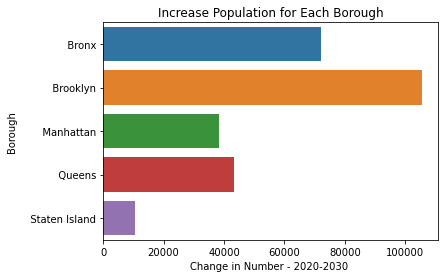

In [1452]:

sns.barplot(y = 'Borough' , x = 'Change in Number - 2020-2030 ' ,data=Projected_Population_sql)\
.set_title('Increase Population for Each Borough');


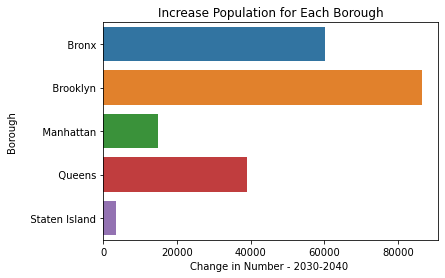

In [1453]:
sns.barplot(y = 'Borough' , x = 'Change in Number - 2030-2040 ' ,data=Projected_Population_sql)\
.set_title('Increase Population for Each Borough');

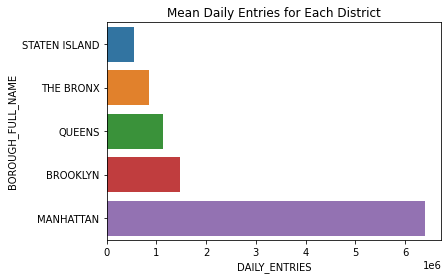

In [1439]:
#plt.figure(figsize=(6,6))
sns.barplot(y = 'BOROUGH_FULL_NAME' , x = 'DAILY_ENTRIES' ,data=plot_mean_borough)\
.set_title('Mean Daily Entries for Each District');

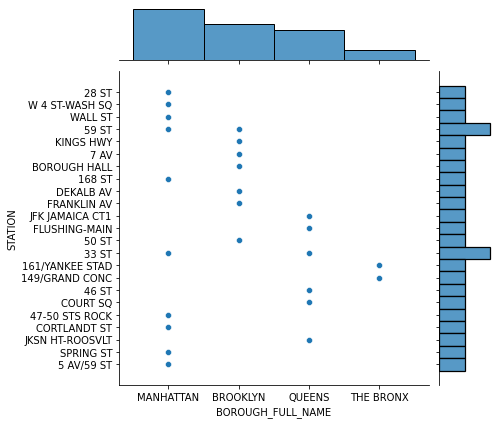

In [1247]:
sns.jointplot(x=totals_borough_station_daily["BOROUGH_FULL_NAME"][25:50],\
              y=totals_borough_station_daily["STATION"][25:50],\
              data = totals_borough_station_daily);

Text(0.5, 1.0, 'Mean Daily Entries for Stations Group by Each District')

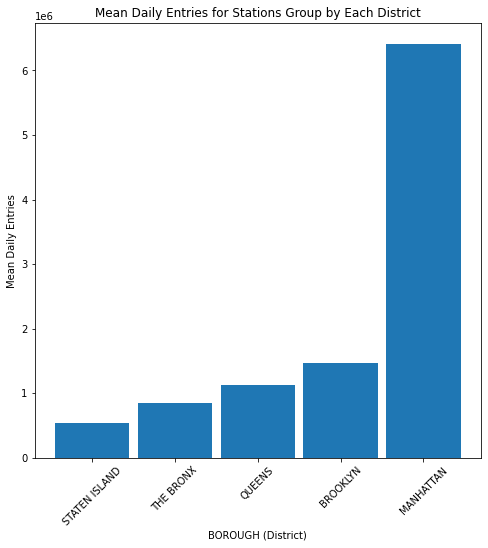

In [1224]:
plt.figure(figsize=(8,8))
plt.bar(x=plot_mean_borough['BOROUGH_FULL_NAME'], height=plot_mean_borough['DAILY_ENTRIES'], width= 0.9)
plt.ylabel('Mean Daily Entries')
plt.xlabel('BOROUGH (District)')
plt.xticks(rotation=45)
plt.title('Mean Daily Entries for Stations Group by Each District')


In [1269]:
num_station_in_borough = []
num_station_in_borough.append(borough_station_daily[borough_station_daily.BOROUGH_FULL_NAME == 'STATEN ISLAND'].STATION.count())
num_station_in_borough.append(borough_station_daily[borough_station_daily.BOROUGH_FULL_NAME == 'THE BRONX'].STATION.count())
num_station_in_borough.append(borough_station_daily[borough_station_daily.BOROUGH_FULL_NAME == 'QUEENS'].STATION.count())
num_station_in_borough.append(borough_station_daily[borough_station_daily.BOROUGH_FULL_NAME == 'BROOKLYN'].STATION.count())
num_station_in_borough.append(borough_station_daily[borough_station_daily.BOROUGH_FULL_NAME == 'MANHATTAN'].STATION.count())
num_station_in_borough

[180, 6119, 7223, 15118, 13338]

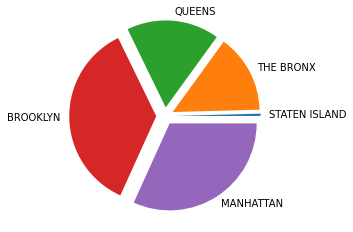

In [1275]:
plt.pie(num_station_in_borough,labels=['STATEN ISLAND','THE BRONX','QUEENS','BROOKLYN','MANHATTAN'], explode = [0.1,0.1,0.1,0.1,0.1]);

Text(0.5, 1.0, 'Daily Entries for Turnstile A011/R080/01-00-00 at 57 ST-7 AV Station')

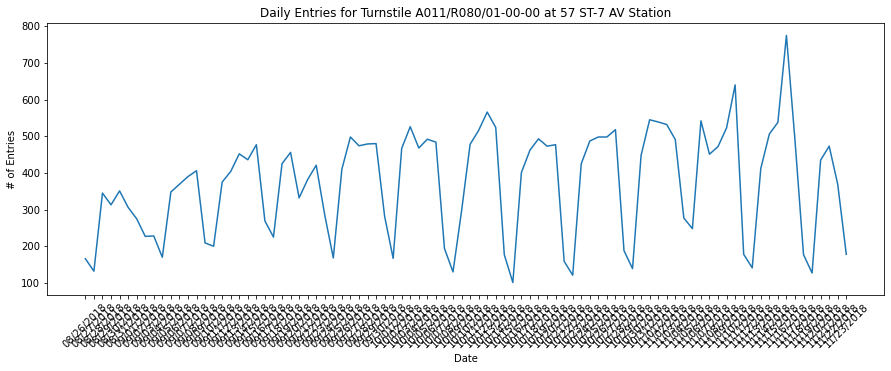

In [105]:
plt.figure(figsize=(15,5))
plt.plot(single_turnstile['DATE'], single_turnstile['DAILY_ENTRIES'])
plt.ylabel('# of Entries')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title('Daily Entries for Turnstile A011/R080/01-00-00 at 57 ST-7 AV Station')

In [106]:
station_daily_57_av = station_daily[station_daily['STATION'] == '57 ST-7 AV']
station_daily_57_av.head()

,STATION,DATE,DAILY_ENTRIES
7252,57 ST-7 AV,08/26/2018,21261.0
7253,57 ST-7 AV,08/27/2018,18335.0
7254,57 ST-7 AV,08/28/2018,35529.0
7255,57 ST-7 AV,08/29/2018,37681.0
7256,57 ST-7 AV,08/30/2018,37844.0


Text(0.5, 1.0, 'Daily Entries for 57 ST-7 AV Station')

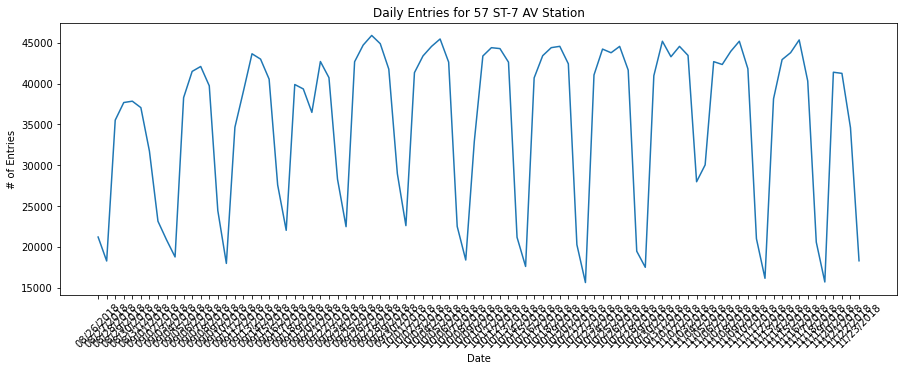

In [107]:
plt.figure(figsize=(15,5))
plt.plot(station_daily_57_av['DATE'], station_daily_57_av['DAILY_ENTRIES'])
plt.ylabel('# of Entries')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title('Daily Entries for 57 ST-7 AV Station')

In [108]:
station_daily_57_av['DAY_OF_WEEK_NUM'] = pd.to_datetime(station_daily_57_av['DATE']).dt.dayofweek
station_daily_57_av['WEEK_OF_YEAR'] = pd.to_datetime(station_daily_57_av['DATE']).dt.week
station_daily_57_av

<ipython-input-108-43a113d8b32f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_daily_57_av['DAY_OF_WEEK_NUM'] = pd.to_datetime(station_daily_57_av['DATE']).dt.dayofweek
<ipython-input-108-43a113d8b32f>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  station_daily_57_av['WEEK_OF_YEAR'] = pd.to_datetime(station_daily_57_av['DATE']).dt.week
<ipython-input-108-43a113d8b32f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

,STATION,DATE,DAILY_ENTRIES,DAY_OF_WEEK_NUM,WEEK_OF_YEAR
7252,57 ST-7 AV,08/26/2018,21261.0,6,34
7253,57 ST-7 AV,08/27/2018,18335.0,0,35
7254,57 ST-7 AV,08/28/2018,35529.0,1,35
7255,57 ST-7 AV,08/29/2018,37681.0,2,35
7256,57 ST-7 AV,08/30/2018,37844.0,3,35
...,...,...,...,...,...
7337,57 ST-7 AV,11/19/2018,15772.0,0,47
7338,57 ST-7 AV,11/20/2018,41379.0,1,47
7339,57 ST-7 AV,11/21/2018,41241.0,2,47
7340,57 ST-7 AV,11/22/2018,34599.0,3,47


Text(0.5, 1.0, 'Ridership per day for 57 ST-7 AV station')

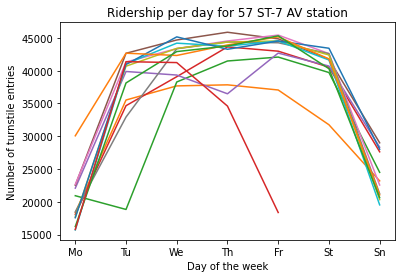

In [109]:
#each line is one week for one station(ex. Week 34)
for i, group in station_daily_57_av.groupby('WEEK_OF_YEAR'):
    plt.plot(group['DAY_OF_WEEK_NUM'], group['DAILY_ENTRIES'])
    
plt.xlabel('Day of the week')
plt.ylabel('Number of turnstile entries')
plt.legend
plt.xticks(np.arange(7),['Mo','Tu','We','Th','Fr','St','Sn'])
plt.title('Ridership per day for 57 ST-7 AV station')

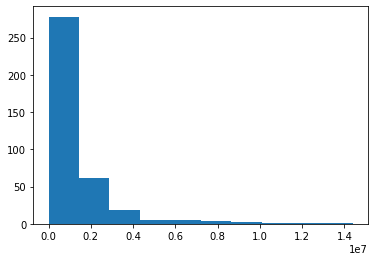

In [110]:
plt.hist(station_totals['DAILY_ENTRIES']);

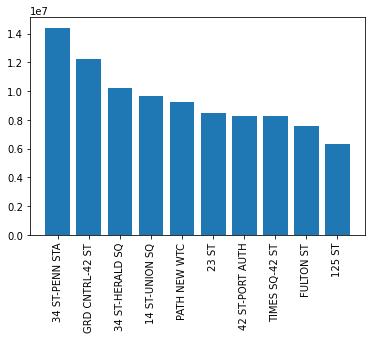

In [111]:
#top ten stations
plt.bar(x=station_totals['STATION'][:10], height=station_totals['DAILY_ENTRIES'][:10])
plt.xticks(rotation=90);

In [ ]:
STATION_NAME_BOROUGH[STATION_NAME_BOROUGH.STATION == '125 ST']
